# Introduction to text embeddings on S&P 500 news

objectives# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Retrieve Financial News:**
   - Use the `yfinance` library to gather news headlines for all companies in the S&P 500 index.

2. **Clean and Structure Financial Text Data:**
   - Extract and organize relevant metadata (e.g., ticker, title, summary, publication date, URL) into a structured pandas DataFrame.

3. **Generate Text Embeddings:**
   - Apply a pre-trained sentence transformer model (`all-MiniLM-L6-v2`) to convert news headlines and summaries into numerical embeddings.

4. **Apply Clustering Techniques:**
   - Use K-Means clustering to identify groups of similar news articles based on semantic content.

5. **Determine Optimal Number of Clusters:**
   - Evaluate clustering quality using silhouette scores to find the best number of clusters.

6. **Visualize High-Dimensional Embeddings:**
   - Reduce the embedding space using PCA and visualize clusters in two dimensions.

7. **Interpret Cluster Themes:**
   - Analyze representative news


## Install and Import important librairies

In [32]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install -U sentence-transformers

In [33]:
%pip install --upgrade yfinance

In [34]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.metrics import silhouette_score
import yfinance as yf
import time # This line fix the ERROR to get the news correctly
from datetime import datetime

## Get the list of stocks in the S&P 500

In [35]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

display(df_tickers.head())

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [36]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the news of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the news of all 500 stocks in the index.
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

### Get the news in a dictionary

In [37]:
# Create a dictionary where the keys are the symbols (tickers) of each 500 stocks
# and the value is the output news from the yfinance library

# YOUR CODE HERE

news_dict = {}
for ticker in ticker_list:
    try:
        news = yf.Ticker(ticker).news
        news_dict[ticker] = news
        print(f"News for: {ticker}")
    except Exception as e:
        print(f"Cannot get the news for {ticker}: {e}")
        news_dict[ticker] = None
    time.sleep(0.5)

News for: MMM
News for: AOS
News for: ABT
News for: ABBV
News for: ACN
News for: ADBE
News for: AMD
News for: AES
News for: AFL
News for: A
News for: APD
News for: ABNB
News for: AKAM
News for: ALB
News for: ARE
News for: ALGN
News for: ALLE
News for: LNT
News for: ALL
News for: GOOGL
News for: GOOG
News for: MO
News for: AMZN
News for: AMCR
News for: AEE
News for: AEP
News for: AXP
News for: AIG
News for: AMT
News for: AWK
News for: AMP
News for: AME
News for: AMGN
News for: APH
News for: ADI
News for: AON
News for: APA
News for: APO
News for: AAPL
News for: AMAT
News for: APTV
News for: ACGL
News for: ADM
News for: ANET
News for: AJG
News for: AIZ
News for: T
News for: ATO
News for: ADSK
News for: ADP
News for: AZO
News for: AVB
News for: AVY
News for: AXON
News for: BKR
News for: BALL
News for: BAC
News for: BAX
News for: BDX
News for: BRK.B
News for: BBY
News for: TECH
News for: BIIB
News for: BLK
News for: BX
News for: XYZ
News for: BK
News for: BA
News for: BKNG
News for: BSX
New

In [38]:
print(news_dict['MMM']) # Example to view the output of an element

[{'id': '2f475c52-e043-3340-9129-7f18b3fdb18d', 'content': {'id': '2f475c52-e043-3340-9129-7f18b3fdb18d', 'contentType': 'STORY', 'title': '3M Company (MMM): “I Was Surprised” By The Organic Growth Rate, Says Jim Cramer', 'description': '', 'summary': 'We recently published 12 Stocks Jim Cramer Talked About. 3M Company (NYSE:MMM) is one of the stocks Jim Cramer recently discussed. 3M Company (NYSE:MMM) is one of the largest industrial conglomerates in the world. Its shares have gained 16.7% year-to-date as part of a bullish run in industrial stocks that Cramer has commented on several […]', 'pubDate': '2025-07-24T09:03:00Z', 'displayTime': '2025-07-24T09:03:00Z', 'isHosted': True, 'bypassModal': False, 'previewUrl': None, 'thumbnail': {'originalUrl': 'https://media.zenfs.com/en/insidermonkey.com/093e1a4edd0e304bc17c1f522a735210', 'originalWidth': 1000, 'originalHeight': 667, 'caption': '3M Company (MMM): "I Was Surprised" By The Organic Growth Rate, Says Jim Cramer', 'resolutions': [{'

### Structure the news into a pandas dataframe

Your final dataframe should have the following columns:
- TICKER
- TITLE (of the news)
- SUMMARY (of the news)
- PUBLICATION_DATE (of the news)
- URL (of the news)

Note: all of those fields are provided in the yfinance news component. Refer to the library documentation.

In [39]:
# YOUR CODE HERE
# USE AS MANY CELLS AS YOU NEED
# MAKE SURE TO DISPLAY INTERMEDIARY RESULS

news_df = pd.DataFrame(columns=['TICKER', 'TITLE', 'SUMMARY', 'PUBLICATION_DATE', 'URL'])

In [40]:
rows = []

for ticker, articles in news_dict.items():
        if articles is None:
          continue  # saltar si no hay noticias para ese ticker

        for article in articles:
            content = article.get('content', article)  # Algunos artículos vienen sin 'content' anidado

            title = content.get('title', '')
            summary = content.get('summary', '')

            # Convertir pubDate en string ISO a 'YYYY-MM-DD'
            pub_date_str = content.get('pubDate', '')
            if pub_date_str:
                try:
                    publication_date = datetime.fromisoformat(pub_date_str.replace("Z", "")).strftime('%Y-%m-%d')
                except ValueError:
                    publication_date = ''
            else:
                publication_date = ''

            # Obtener URL
            url = content.get('canonicalUrl', {}).get('url') or content.get('clickThroughUrl', {}).get('url') or content.get('link', '')

            rows.append({
                'TICKER': ticker,
                'TITLE': title,
                'SUMMARY': summary,
                'PUBLICATION_DATE': publication_date,
                'URL': url
        })

In [41]:
news_df = pd.DataFrame(rows)
news_df.head(20)

,TICKER,TITLE,SUMMARY,PUBLICATION_DATE,URL
0,MMM,3M Company (MMM): “I Was Surprised” By The Org...,We recently published 12 Stocks Jim Cramer Tal...,2025-07-24,https://finance.yahoo.com/news/3m-company-mmm-...
1,MMM,"Zacks Industry Outlook Highlights Honeywell, 3...","HON, MMM, CSL, and FSS are well-positioned to ...",2025-07-21,https://finance.yahoo.com/news/zacks-industry-...
2,MMM,"Stock Market News for Jul 21, 2025",U.S. stock markets closed mostly lower n Frida...,2025-07-21,https://finance.yahoo.com/news/stock-market-ne...
3,MMM,3M Co (MMM) Q2 2025 Earnings Call Highlights: ...,3M Co (MMM) reports a 12% increase in adjusted...,2025-07-19,https://finance.yahoo.com/news/3m-co-mmm-q2-20...
4,MMM,MMM Q1 Deep Dive: Tariffs Loom Over Stable Ope...,Industrial conglomerate 3M (NYSE:MMM) reported...,2025-07-19,https://finance.yahoo.com/news/mmm-q1-deep-div...
5,MMM,Dow Falls as Trump Reportedly Seeks Higher EU ...,The Dow Jones Industrial Average fell Friday f...,2025-07-18,https://finance.yahoo.com/news/dow-falls-trump...
6,MMM,3M Gives Investors a ‘Beat and Raise.’ The Sto...,3M traded higher initially after reporting be...,2025-07-18,https://www.barrons.com/articles/3m-stock-pric...
7,MMM,Equities Fall Intraday as Trump Reportedly Pus...,US benchmark equity indexes fell intraday amid...,2025-07-18,https://finance.yahoo.com/news/equities-fall-i...
8,MMM,US Equity Indexes Slip in Choppy Trading After...,US equity indexes slipped in choppy midday tra...,2025-07-18,https://finance.yahoo.com/news/us-equity-index...
9,MMM,"3M (MMM) Stock Trades Down, Here Is Why",Shares of industrial conglomerate 3M (NYSE:MMM...,2025-07-18,https://finance.yahoo.com/news/3m-mmm-stock-tr...


## Exploring text embeddings

- Use the open-source model: 'sentence-transformers/all-MiniLM-L6-v2' to create embeddings on the news title and summary
- Add a column to your news dataframe called EMBEDDED_TEXT using ONLY the TITLE of the news
- Add a column to your news dataframe called EMBEDDINGS, which contains the embedding of EMBEDDED_TEXT


In [42]:
# YOUR CODE HERE
# USE AS MANY CELLS AS YOU NEED
# MAKE SURE TO DISPLAY INTERMEDIARY RESULS

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [43]:
news_df['EMBEDDED_TEXT'] = news_df['TITLE']

In [44]:
embeddings = model.encode(news_df['EMBEDDED_TEXT'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [45]:
news_df['EMBEDDINGS'] = embeddings.tolist()

In [46]:
news_df.head(20)

,TICKER,TITLE,SUMMARY,PUBLICATION_DATE,URL,EMBEDDED_TEXT,EMBEDDINGS
0,MMM,3M Company (MMM): “I Was Surprised” By The Org...,We recently published 12 Stocks Jim Cramer Tal...,2025-07-24,https://finance.yahoo.com/news/3m-company-mmm-...,3M Company (MMM): “I Was Surprised” By The Org...,"[0.006455422844737768, -0.1090475395321846, -0..."
1,MMM,"Zacks Industry Outlook Highlights Honeywell, 3...","HON, MMM, CSL, and FSS are well-positioned to ...",2025-07-21,https://finance.yahoo.com/news/zacks-industry-...,"Zacks Industry Outlook Highlights Honeywell, 3...","[-0.021629296243190765, -0.07978324592113495, ..."
2,MMM,"Stock Market News for Jul 21, 2025",U.S. stock markets closed mostly lower n Frida...,2025-07-21,https://finance.yahoo.com/news/stock-market-ne...,"Stock Market News for Jul 21, 2025","[-0.037469569593667984, -0.04381372779607773, ..."
3,MMM,3M Co (MMM) Q2 2025 Earnings Call Highlights: ...,3M Co (MMM) reports a 12% increase in adjusted...,2025-07-19,https://finance.yahoo.com/news/3m-co-mmm-q2-20...,3M Co (MMM) Q2 2025 Earnings Call Highlights: ...,"[-0.08080150932073593, -0.02980075404047966, -..."
4,MMM,MMM Q1 Deep Dive: Tariffs Loom Over Stable Ope...,Industrial conglomerate 3M (NYSE:MMM) reported...,2025-07-19,https://finance.yahoo.com/news/mmm-q1-deep-div...,MMM Q1 Deep Dive: Tariffs Loom Over Stable Ope...,"[-0.019502639770507812, -0.07280389964580536, ..."
5,MMM,Dow Falls as Trump Reportedly Seeks Higher EU ...,The Dow Jones Industrial Average fell Friday f...,2025-07-18,https://finance.yahoo.com/news/dow-falls-trump...,Dow Falls as Trump Reportedly Seeks Higher EU ...,"[0.018626129254698753, -0.0316285640001297, 0...."
6,MMM,3M Gives Investors a ‘Beat and Raise.’ The Sto...,3M traded higher initially after reporting be...,2025-07-18,https://www.barrons.com/articles/3m-stock-pric...,3M Gives Investors a ‘Beat and Raise.’ The Sto...,"[0.023755811154842377, -0.10996507853269577, -..."
7,MMM,Equities Fall Intraday as Trump Reportedly Pus...,US benchmark equity indexes fell intraday amid...,2025-07-18,https://finance.yahoo.com/news/equities-fall-i...,Equities Fall Intraday as Trump Reportedly Pus...,"[0.040155719965696335, 0.016992364078760147, 0..."
8,MMM,US Equity Indexes Slip in Choppy Trading After...,US equity indexes slipped in choppy midday tra...,2025-07-18,https://finance.yahoo.com/news/us-equity-index...,US Equity Indexes Slip in Choppy Trading After...,"[0.04435599222779274, -0.11096718907356262, 0...."
9,MMM,"3M (MMM) Stock Trades Down, Here Is Why",Shares of industrial conglomerate 3M (NYSE:MMM...,2025-07-18,https://finance.yahoo.com/news/3m-mmm-stock-tr...,"3M (MMM) Stock Trades Down, Here Is Why","[0.04963048920035362, -0.09073001891374588, 0...."


## Using K-means clustering on news embeddings
to simplify, keep only one news for each company (ticker), you should have 500 rows in your news dataframe

In [47]:
# YOUR CODE HERE
# USE AS MANY CELLS AS YOU NEED
# MAKE SURE TO DISPLAY INTERMEDIARY RESULS

news_df_unique = news_df.drop_duplicates(subset='TICKER', keep='first')

In [48]:
news_df_unique.head(5)

,TICKER,TITLE,SUMMARY,PUBLICATION_DATE,URL,EMBEDDED_TEXT,EMBEDDINGS
0,MMM,3M Company (MMM): “I Was Surprised” By The Org...,We recently published 12 Stocks Jim Cramer Tal...,2025-07-24,https://finance.yahoo.com/news/3m-company-mmm-...,3M Company (MMM): “I Was Surprised” By The Org...,"[0.006455422844737768, -0.1090475395321846, -0..."
10,AOS,Here's Why A.O. Smith (AOS) is a Strong Value ...,"Wondering how to pick strong, market-beating s...",2025-07-28,https://finance.yahoo.com/news/heres-why-o-smi...,Here's Why A.O. Smith (AOS) is a Strong Value ...,"[-0.051860470324754715, -0.044124409556388855,..."
20,ABT,Revvity trims 2025 profit forecast as China po...,(Reuters) -Revvity on Monday lowered its full-...,2025-07-28,https://finance.yahoo.com/news/revvity-trims-2...,Revvity trims 2025 profit forecast as China po...,"[0.00020875422342214733, -0.009514658711850643..."
30,ABBV,HS market forecast to reach $7.8bn across 7MM ...,This 15.6% CAGR is largely attributed to the l...,2025-07-28,https://www.pharmaceutical-technology.com/anal...,HS market forecast to reach $7.8bn across 7MM ...,"[-0.012529839761555195, -0.0252490546554327, 0..."
40,ACN,Accenture’s (ACN) Oversold Status May Offer a ...,Accenture plc (NYSE:ACN) is included among the...,2025-07-26,https://finance.yahoo.com/news/accenture-acn-o...,Accenture’s (ACN) Oversold Status May Offer a ...,"[-0.07867277413606644, -0.07679502665996552, 0..."


In [49]:
print("Unique news per company:", news_df_unique.shape[0])

Unique news per company: 501


In [50]:
duplicate = news_df_unique['TICKER'].value_counts()
duplicate = duplicate[duplicate > 1]
print(duplicate)

Series([], Name: count, dtype: int64)


For some reason, the output for unique news per company is 502. However, using the cell above, I verified that none of the company tickers are duplicated in the DataFrame. It is also possible to have two extra companies due to multiple share classes.



### Identify the number of clusters using the silhouette score

- Using a for loop, do the clustering with different k values (number of clusters), test 1 to 6 clusters
- Compute the silhouette score for every k value
- Plot the silhouette score for different k values

#### Try different values of k and compute silhouette scores

In [51]:
# YOUR CODE HERE
# USE AS MANY CELLS AS YOU NEED
# MAKE SURE TO DISPLAY INTERMEDIARY RESULS

silhouette_scores = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, silhouette score = {score:.4f}")

k = 2, silhouette score = 0.0345
k = 3, silhouette score = 0.0377
k = 4, silhouette score = 0.0224
k = 5, silhouette score = 0.0182
k = 6, silhouette score = 0.0190


#### Plot silhouette scores

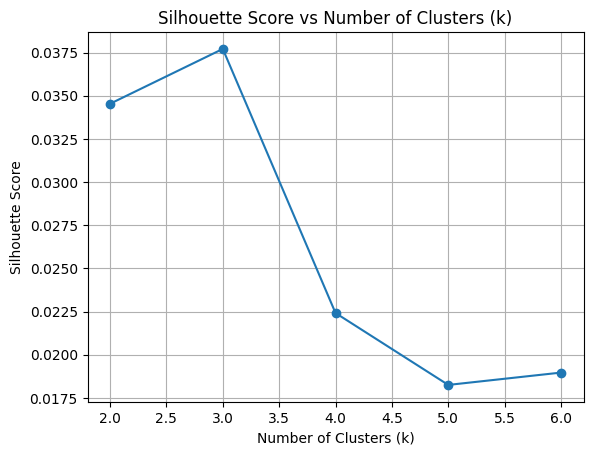

In [52]:
# YOUR CODE HERE
# USE AS MANY CELLS AS YOU NEED
# MAKE SURE TO DISPLAY INTERMEDIARY RESULS

plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

#### Identify the Best k

In [53]:
# YOUR CODE HERE
# USE AS MANY CELLS AS YOU NEED
# MAKE SURE TO DISPLAY INTERMEDIARY RESULS

best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("Best k based on silhouette score:", best_k)

Best k based on silhouette score: 3


#### Cluster the embeddings using 3 clusters (k=3)

In [54]:
# YOUR CODE HERE
# USE AS MANY CELLS AS YOU NEED
# MAKE SURE TO DISPLAY INTERMEDIARY RESULS

texts = news_df_unique['TITLE'].tolist()
new_embeddings = model.encode(texts)

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(new_embeddings)

news_df_unique['CLUSTER'] = labels

news_df_unique[['TICKER', 'TITLE', 'CLUSTER']].head()

/tmp/ipython-input-54-786288064.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_unique['CLUSTER'] = labels


,TICKER,TITLE,CLUSTER
0,MMM,3M Company (MMM): “I Was Surprised” By The Org...,2
10,AOS,Here's Why A.O. Smith (AOS) is a Strong Value ...,0
20,ABT,Revvity trims 2025 profit forecast as China po...,2
30,ABBV,HS market forecast to reach $7.8bn across 7MM ...,2
40,ACN,Accenture’s (ACN) Oversold Status May Offer a ...,0


### Visualize the 2 first PCA Components of your embeddings

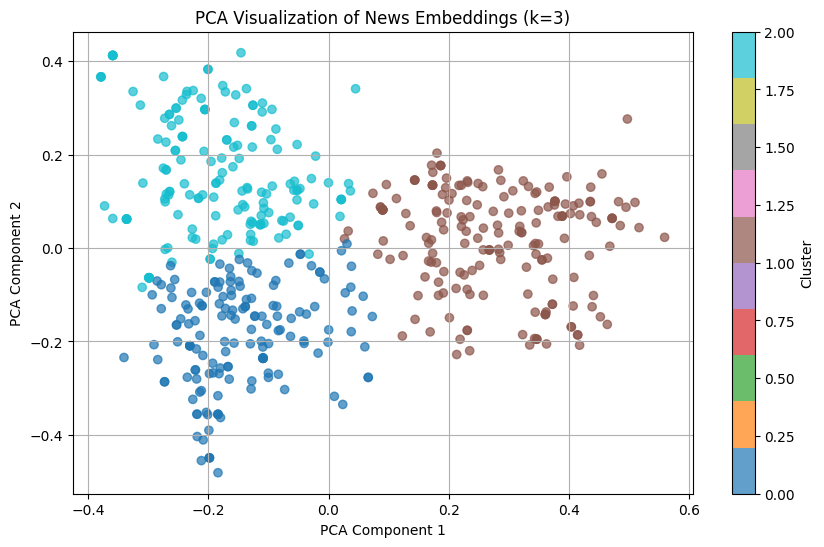

In [55]:
# YOUR CODE HERE
# USE AS MANY CELLS AS YOU NEED
# MAKE SURE TO DISPLAY INTERMEDIARY RESULS

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(new_embeddings)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    reduced_embeddings[:, 0],
    reduced_embeddings[:, 1],
    c=labels, cmap='tab10', alpha=0.7
)

plt.title("PCA Visualization of News Embeddings (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

#### Analyze the content of each cluster
- Add the kmeans cluster label to your news dataframe
- Print the content of each cluster and analyze it

In [56]:
# YOUR CODE HERE
# USE AS MANY CELLS AS YOU NEED
# MAKE SURE TO DISPLAY INTERMEDIARY RESULS

news_df_clustered = news_df_unique.copy()
news_df_clustered.head()

,TICKER,TITLE,SUMMARY,PUBLICATION_DATE,URL,EMBEDDED_TEXT,EMBEDDINGS,CLUSTER
0,MMM,3M Company (MMM): “I Was Surprised” By The Org...,We recently published 12 Stocks Jim Cramer Tal...,2025-07-24,https://finance.yahoo.com/news/3m-company-mmm-...,3M Company (MMM): “I Was Surprised” By The Org...,"[0.006455422844737768, -0.1090475395321846, -0...",2
10,AOS,Here's Why A.O. Smith (AOS) is a Strong Value ...,"Wondering how to pick strong, market-beating s...",2025-07-28,https://finance.yahoo.com/news/heres-why-o-smi...,Here's Why A.O. Smith (AOS) is a Strong Value ...,"[-0.051860470324754715, -0.044124409556388855,...",0
20,ABT,Revvity trims 2025 profit forecast as China po...,(Reuters) -Revvity on Monday lowered its full-...,2025-07-28,https://finance.yahoo.com/news/revvity-trims-2...,Revvity trims 2025 profit forecast as China po...,"[0.00020875422342214733, -0.009514658711850643...",2
30,ABBV,HS market forecast to reach $7.8bn across 7MM ...,This 15.6% CAGR is largely attributed to the l...,2025-07-28,https://www.pharmaceutical-technology.com/anal...,HS market forecast to reach $7.8bn across 7MM ...,"[-0.012529839761555195, -0.0252490546554327, 0...",2
40,ACN,Accenture’s (ACN) Oversold Status May Offer a ...,Accenture plc (NYSE:ACN) is included among the...,2025-07-26,https://finance.yahoo.com/news/accenture-acn-o...,Accenture’s (ACN) Oversold Status May Offer a ...,"[-0.07867277413606644, -0.07679502665996552, 0...",0


In [57]:
for c in sorted(news_df_clustered['CLUSTER'].unique()):
    print(f"\n- Cluster {c}:")
    cluster_titles = news_df_clustered[news_df_clustered['CLUSTER'] == c]['TITLE'].head(8)
    for title in cluster_titles:
        print("-", title)


- Cluster 0:
- Here's Why A.O. Smith (AOS) is a Strong Value Stock
- Accenture’s (ACN) Oversold Status May Offer a Smart Entry Point for Dividend Investors
- AMD stock jumps on 3 catalysts, Boeing faces potential strike
- Albermarle Stock Drops 10%. Lithium Rally Is ‘Transitory.’
- 2 Reliable Dividend Stocks With Yields Above 5% to Buy Now and Hold Forever
- Stock market today: S&P 500, Nasdaq eke out records as markets kick off huge week for US economy
- Ameren (AEE) Earnings Expected to Grow: Should You Buy?
- 2 Top Dividend Stocks to Buy Right Now and Hold Forever

- Cluster 1:
- AES to Report Q2 Earnings: What's in Store for the Stock?
- Agilent Technologies' Q3 2025 Earnings: What to Expect
- Akamai Technologies Earnings Preview: What to Expect
- Allegion Second Quarter 2025 Earnings: Beats Expectations
- Alliant Energy’s Quarterly Earnings Preview: What You Need to Know
- Palomar (PLMR) Earnings Expected to Grow: Should You Buy?
- Altria's Q2 Earnings on the Deck: How to Play th



*   Cluster 0 - For this cluster, news headlines related to upcoming or recently published quarterly earnings. Where companies report their financial performance, including words like “earnings,” “report,” “preview,” and “expectations.” The title's articles in this group typically highlight whether a company is expected to beat or miss analyst projections, and how that might affect its stock price.
*   Cluster 1 - Headlines in this cluster focus on strategic shifts, geopolitical influences, and statements from influential executives, where the company's stocks can be affected. These articles are more narrative-driven and provide macro-level insights.
*   Cluster 2 - This group contains headlines in order to invest, including value stock suggestions, dividend announcements, and buy/sell recommendations. Terms like “dividend,” “value stock,” “buy now,” and “strong performer” are common.




## Question Section

Take time to reflect on what you've implemented and observed. Answer the following questions in a separate markdown cell or notebook file:

---

### Technical Understanding

#### 1️⃣ How might the choice of embedding model (e.g., MiniLM vs. a larger transformer) affect your clustering results and interpretation?

The choice of embedding model may affect clustering quality. Where MiniLM is fast and efficient but may miss subtle meanings. Larger models capture deeper context, leading to better cluster separation and interpretation, but they are slower and need more resources.

---

#### 2️⃣ What would be the differences in embeddings if you used only the TITLE, only the SUMMARY, or the combination of both? How could you empirically test this?

For using only the title gives a brief and focused representation of the news, but it may miss important context. Only the summary will provide more detail, capturing richer semantics. Finally, the combination of both usually results in more informative embeddings, improving clustering and interpretation.

---

#### 3️⃣ In what situations would using a different dimensionality reduction method (e.g., t-SNE, UMAP) be preferable over PCA for visualization of embeddings?

PCA is linear and best for preserving global structure, but it may miss complex patterns. t-SNE and UMAP are nonlinear methods that better preserve local relationships and cluster structure, making them preferable when the data has nonlinear relationships, local similarity has more priority over global variance and to visualize and separate dense clusters.


---

### Data Analysis and Interpretation

#### 4️⃣ Based on your cluster analysis, identify at least two potential challenges you faced in interpreting the clusters and propose strategies to address them.

Some clusters had overlapping content, making it hard to define clear themes, to have better results a larger embedding model can be used for richer representations or refine preprocessing as answered in question 2, combining title + summary. Also, certain news titles were too generic or vague, reducing clustering clarity, this could be filter out low-information titles or assign weights that prioritize more descriptive text

---

#### 5️⃣ Did you observe any outliers in your 2D visualization? How would you identify and handle these outliers in a production pipeline?

Yes, a few outliers were visible in the 2D PCA plot—data points far from the main cluster groups. These could represent unusual or ambiguous news items. In a production pipeline can be identified using distance-based methods (isolation forest or DBSCAN) or by setting thresholds on PCA/t-SNE coordinates, also can be handled by flagging them for manual review, excluding them from training, or assigning them to a separate miscellaneous cluster.

---

#### 6️⃣ If you could assign a 'label' or 'theme' to each cluster you obtained, what would they be? How confident are you in these assignments, and what could you do to validate them systematically?

* Cluster 0: Earnings & Financial Reports
* Cluster 1: Strategic Decisions & Market Trends
* Cluster 2: Investment Advice & Dividends

This titles can be explained by keyword patterns and titles content, this can be analyzed by use a topic modeling to detect dominant terms per cluster, perform manual annotation of random samples, or simply compare with external news categories if available.

---

### Critical Thinking

#### 7️⃣ If news sentiment was incorporated into the analysis, how might this influence the clustering structure and interpretation of the clusters in a financial analysis context?

Incorporating news sentiment could refine the clustering by grouping articles not only by topic but also by tone (positive, negative, neutral). This would help distinguish. In a financial context, this adds depth by allowing analysts to identify clusters with bullish vs. bearish sentiment, improving decision-making around market reactions, risk, and investor behavior.

---

#### 8️⃣ Discuss the limitations of using k-means clustering for news embeddings. What alternative clustering methods could address these limitations, and under what conditions would you prefer them?

K-means clustering has several limitations when applied to news embeddings. It assumes clusters are spherical and equally sized, which is often unrealistic in natural language data. It’s also sensitive to initialization and outliers, and it requires the number of clusters (k) to be defined in advance, which may not reflect the true structure of the data. Alternative methods like DBSCAN or HDBSCAN can better handle clusters of varying shapes and densities and automatically identify outliers. These alternatives are preferable when the data is noisy, complex, or when the ideal number of clusters is unknown.

---

#### 9️⃣ How could the approach in this notebook be extended to analyze the potential impact of news clusters on stock price movements over time? Sketch a high-level pipeline you would implement to test this.

To extend this approach, we could analyze how different news clusters correlate with stock price movements. First, we would align each news article with the corresponding stock's historical price data (1-day, 3-day, or 7-day return after publication). Then, for each cluster, we’d calculate the average price change following the news to detect patterns. The high-level pipeline would include:

* Generating embeddings and clustering news.
* Linking each article to its stock and publication date.
* Retrieving post-news price changes using a library like yfinance as done for the notebook.
* Adding and comparing price reactions by cluster.
* Using statistical tests or predictive models to assess whether certain clusters are consistently followed by significant market moves.

---

#### 1️⃣0️⃣ Imagine your clustering shows clear groups of news, but your downstream task (e.g., prediction of stock movement) does not improve. What might explain this disconnect between clear clusters and predictive utility?

Clusters may group news based on semantic similarity (topic or tone), but not necessarily on market impact and clustering is unsupervised and may capture features irrelevant to the prediction task. Other factors—like timing, investor sentiment, macroeconomic context, or pre-existing market expectations can influence stock movements more than the textual content alone. This disconnect highlights the need to align feature engineering with the specific goals of the downstream task.

